# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [137]:
# Parameters
m = 3
A = 0.1725

0.1725

In [138]:
res=m;
N=2.0^m*100#2.0^m*1000.0;#2.0^m*500.0;#N=2.0^m*500.0#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx,digits=10);
Nt=2^m*100.0#100.0*2^m*10
Tf=Nt*dt; #final time

println("the final time is ", Tf)

the final time is 1.0


In [139]:
print(N)

800.0

In [140]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)
println("epsilon <= dx/dt * (1/2)^(2*2-1) = ", dx/dt*(1/2)^(2*2-1))

println("epsilon = dx/dt * (1/2)^(2*2) = ", dx/dt*(1/2)^(2*2))

println("epsilon = dx/dt * (1/2)^(2*3) = ", dx/dt*(1/2)^(2*3))

println("epsilon = dx/dt * (1/2)^(2) = ", dx/dt*(1/2)^(2))

dx =0.00125
dt =0.00125
dx/dt =1.0
epsilon <= dx/dt * (1/2)^(2*2-1) = 0.125
epsilon = dx/dt * (1/2)^(2*2) = 0.0625
epsilon = dx/dt * (1/2)^(2*3) = 0.015625
epsilon = dx/dt * (1/2)^(2) = 0.25


In [141]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res$res"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3"

In [142]:
epsilon=0.1##0.01#0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)

0.1

# Grid

In [143]:
ori=0.0;
initX1 = nothing
initX1=range(ori, stop=Xf, step=dx);

In [144]:
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf,step=dt)
println("the time step is ", dt)

step size is  0.00125
the time step is 0.00125


In [145]:
include("./ScalarField.jl");

# Initial data of m β Ψ and Ψ,x

In [146]:
using PyCall   
using Interpolations

scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")


####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.3#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
"""for i in 4:L-3
    initderpsi[i]=Der(state_array[:,:],i,3,initX)
end

state_array[:,4] = initderpsi
state_array = ghost(state_array)"""

#new
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

"""spl_psi = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,3],k=4)
psi_func(x) = scipyinterpolate.splev(x, spl_psi)

spl_derpsi = scipyinterpolate.splrep(initX[4:L-3], initderpsi[4:L-3],k=4)
derpsi_func(x) = scipyinterpolate.splev(x, spl_derpsi)"""
psi_func = cubic_spline_interpolation(initX[4:L-3], state_array[4:L-3,3],  extrapolation_bc = Line())
derpsi_func = cubic_spline_interpolation(initX[4:L-3], initderpsi[4:L-3],  extrapolation_bc = Line())

funcs = [psi_func, derpsi_func];

In [147]:
#BETA
beta0=0
initbeta[4:L-3]=rk4wrapper(SFconstraint_beta,beta0,initX1,0,funcs)
state_array[:,2]=initbeta;
state_array=ghost(state_array);


#M
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,initX1,0,funcs)
state_array[:,1]=initm;
state_array = ghost(state_array);

In [148]:
"""using Plots #showing initial data and the initial status of the horizon finder
plot(initX, state_array[:,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])"""

"using Plots #showing initial data and the initial status of the horizon finder\nplot(initX, state_array[:,1:4], xaxis=\"x\",title=\"Initial Data\", labels=[\"m\" \"beta\" \"psi\" \"psi,x\"])"

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [149]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3/time_step0.csv"

In [150]:
timestep=0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 timestep explode]
monitor_ratio = zeros(L)
CSV.write("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "timestep", "explode"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

 ## Time evolution

fixed grid

In [ ]:
finaltime=length(T)-1
timeevolution(state_array,finaltime,dir,res)

Progress:  64%|██████████████████████████               |  ETA: 0:21:45

## Movie of the evolution

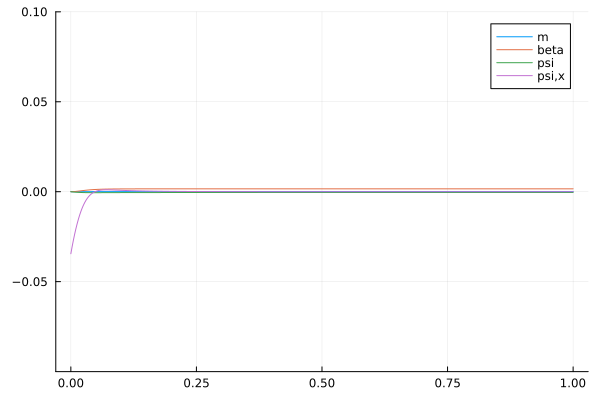

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res2.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res2.gif")
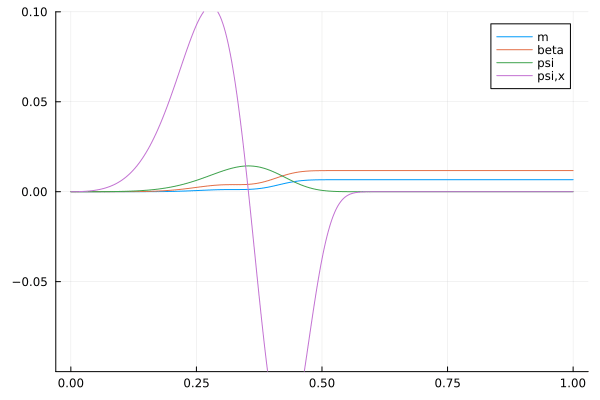

In [136]:
using Plots, CSV, DataFrames
import GR
step=10
anim = @animate for n in 0:step:finaltime-step
    time_step=T[n+2]-T[n+1];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
    plot!(initX[4:L-3], [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.1, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)